<a href="https://colab.research.google.com/github/albertocj1/CCADMACL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
X = df.drop(columns=['show_id'])

In [11]:
categorical_cols = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
numerical_cols = ['release_year']

In [12]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [15]:
X_preprocessed = preprocessor.fit_transform(X)

In [24]:

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components: {pca.n_components_}")

Number of components: 8


2. Create a scree plot for each principal component

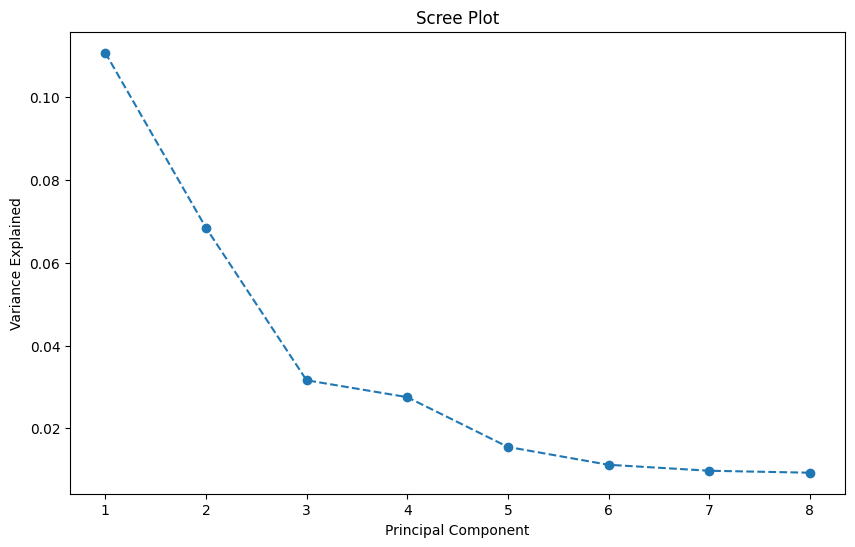

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [27]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components: {pca.n_components_}")

Number of components: 3


3. Use any clustering algorithm to create clusters

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['cluster'] = clusters

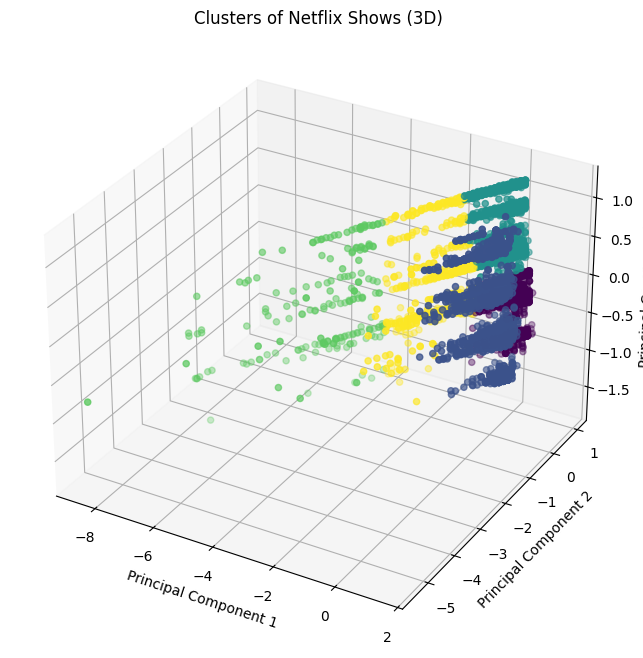

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, coloring them by cluster assignment
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['cluster'], cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set title for the plot
ax.set_title('Clusters of Netflix Shows (3D)')

# Display the plot
plt.show()

4. Profile each cluster that you have generated based on your experiments

In [36]:
for cluster_num in range(5):  # Loop through each cluster (0 to 4)
    print(f"Cluster {cluster_num}:")

    # Filter the DataFrame for shows in the current cluster
    cluster_shows = df[df['cluster'] == cluster_num]

    # Analyze and print cluster characteristics
    print(f"  - Number of shows: {len(cluster_shows)}")
    print(f"  - Most frequent type: {cluster_shows['type'].mode()[0]}")  # Most common show type
    print(f"  - Most frequent rating: {cluster_shows['rating'].mode()[0]}") # Most common rating
    print(f"  - Top 3 listed genres: {cluster_shows['listed_in'].value_counts().head(3)}") # Top 3 genres
    print(f"  - Average release year: {cluster_shows['release_year'].mean():.0f}") # Average release year
    print("\n")  # Add a line break for better readability

Cluster 0:
  - Number of shows: 2558
  - Most frequent type: Movie
  - Most frequent rating: TV-MA
  - Top 3 listed genres: listed_in
Stand-Up Comedy                 271
Documentaries                   205
Dramas, International Movies    123
Name: count, dtype: int64
  - Average release year: 2017


Cluster 1:
  - Number of shows: 2348
  - Most frequent type: TV Show
  - Most frequent rating: TV-MA
  - Top 3 listed genres: listed_in
Kids' TV                                             195
International TV Shows, TV Dramas                    111
Crime TV Shows, International TV Shows, TV Dramas    106
Name: count, dtype: int64
  - Average release year: 2017


Cluster 2:
  - Number of shows: 1950
  - Most frequent type: Movie
  - Most frequent rating: TV-14
  - Top 3 listed genres: listed_in
Dramas, International Movies              159
Comedies, Dramas, International Movies    135
Documentaries                             120
Name: count, dtype: int64
  - Average release year: 2016


Cl